In [2]:
import pandas as pd
import time
import re 
import seaborn as sns
import numpy as np

from tqdm._tqdm_notebook import tqdm_notebook
import numpy as np
tqdm_notebook.pandas()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [1]:
def vader_by_line(lyrics):
    split = lyrics.splitlines()
    lines = list(filter(None, split))
    scores = []
    for line in lines:
        score = analyser.polarity_scores(line)
        scores.append(score['compound'])
    scores = list(filter(lambda x: x != 0.0, scores))
    return np.mean(scores)

In [3]:
song_info = pd.read_csv('../data/lyrics/song_info.txt')
song_info = song_info[song_info['lang'] == 'en']
song_info = song_info[['song_id', 'title', 'artist', 'lyrics', 'audio_features']]
sentiment_scores = pd.read_csv('../data/sentiment_scores.txt')
song_info = song_info.merge(right=sentiment_scores, how='inner', on='song_id')
song_info.head()

,song_id,title,artist,lyrics,audio_features,textblob_score,vader_score
0,6cbqh8woSu03Vj8s1PCK9C,Step Up,Macka B,"Uh\r\nHere we go, that’s right\r\nUh huh uh hu...","{'danceability': 0.895, 'energy': 0.752, 'key'...",0.218276,0.9095
1,3xIHePHJbOEtnzlwAOoCtz,Fulton St.,Leschea,He be rollin' in his jeep\r\nCruisin' down on ...,"{'danceability': 0.736, 'energy': 0.51, 'key':...",-0.116919,0.8571
2,3zb1zBmkrPF6VW8RhlSYA1,Why U Bullshittin'?,Suga Free,"So pay attention, babe\r\nPay attention\r\nOur...","{'danceability': 0.839, 'energy': 0.706, 'key'...",-0.045307,-0.9959
3,6A8KuRrV72ZP4MneZRCsSm,Rude,03 Greedo,[Chorus]\r\nI don't mean to be rude\r\nI don't...,"{'danceability': 0.585, 'energy': 0.65, 'key':...",-0.137222,-0.9938
4,7hphy8rtxpYshs3UzDZTzN,Baby You Got It,Brenton Wood,I run after you like a fool would do\r\nBut ma...,"{'danceability': 0.787, 'energy': 0.708, 'key'...",0.008056,0.9954


In [4]:
reg = "[\(\[].*?[\)\]]"
song_info['lyrics'] = song_info['lyrics'].str.replace(reg, '')

In [5]:
import ast
song_info['musical_valence'] = song_info.audio_features.map(lambda x: ast.literal_eval(x)['valence'])

In [21]:
old_min = 0
old_max = 1
old_range = 1
new_range = 2
new_min = -1
song_info['musical_valence_scaled'] = (((song_info['musical_valence'] - old_min) * new_range) / old_range) + new_min

In [32]:
i = np.random.randint(0, len(song_info))
row = song_info.iloc[i]
print(row['title'], row['artist'])
print('vader_ln_avg:', vader_by_line(row['lyrics']))
print('vader:', row['vader_score'])
print('valence:', row['musical_valence_scaled'])
print(row['lyrics'])

Your Soul Hippie Sabotage
vader_ln_avg: 0.1877
vader: 0.7536
valence: -0.8496
Just because we're not alone
You echo words you've heard
You let me go just to watch me discern
Just because it feels the same
'till the morning comes
Even roads feel the sun so cold
Just because we're not alone
You echo words you've heard
You let me go just to watch me discern
Just because it feels the same
'Til the morning comes
Even roads fill the sun so cold
Just because we're not alone
You echo words you've heard
You let me go just to watch me discern
Just because it feels the same
'Til the morning comes
Even roads fill the sun so cold
Just because we're not alone
You echo words you've heard
You let me go just to watch me discern
Just because it feels the same
'Til the morning comes
Even roads fill the sun so cold
Just because we're not alone
You echo words you've heard
You let me go just to watch me discern
Just because it feels the same
'Til the morning comes
Even roads fill the sun so cold
Just becaus

In [ ]:
song_info['vader_score_lnavg'] = song_info['lyrics'].progress_apply(lambda x: vader_by_line(x))
song_info.head()

In [52]:
song_info['vader_score_lnavg'].fillna(0, inplace=True)

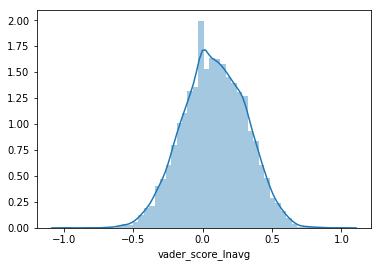

In [53]:
sns.distplot(song_info['vader_score_lnavg'])

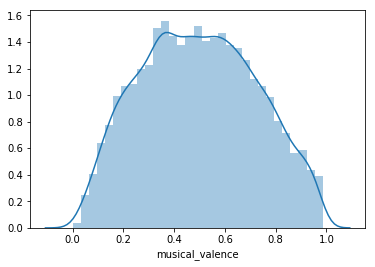

In [54]:
sns.distplot(song_info['musical_valence'])

In [64]:
old_min = 0
old_max = 1
old_range = 1
new_range = 2
new_min = -1
song_info['musical_valence_scaled'] = (((song_info['musical_valence'] - old_min) * new_range) / old_range) + new_min

In [83]:
sample = song_info.sample(30)
with open('../lyrics_score_validation.txt', 'a', encoding='utf-8') as file:
    for i, row in sample.iterrows():
        stats = '[musical_valence_scaled: %s, vader_score: %s, vader_avged_score: %s]'%(round(row['musical_valence_scaled'],4), row['vader_score'], round(row['vader_score_lnavg'],4))
        full_str = '\n\n=== %s by %s ===\n%s\n\n'%(row['title'], row['artist'], stats)
        file.write(full_str)
    #     print('[musical_valence: '+ str(row['musical_valence']) +' vader_score: '+ str(row['vader_score']))
        file.write(row['lyrics'])
file.close()

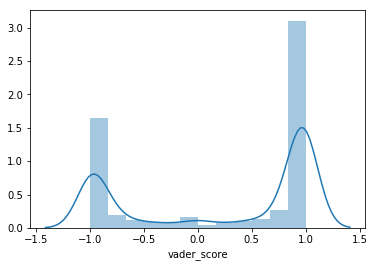

In [78]:
sns.distplot(song_info['vader_score'])

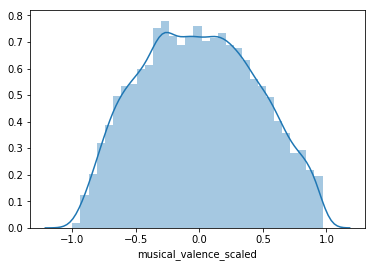

In [76]:
sns.distplot(song_info['musical_valence_scaled'])

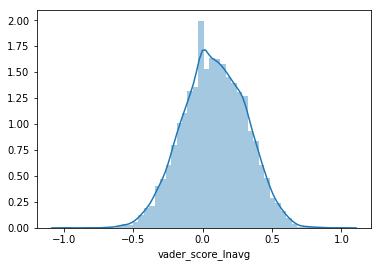

In [79]:
sns.distplot(song_info['vader_score_lnavg'])

In [80]:
song_info.sort_values(by='vader_score_lnavg')

,song_id,title,artist,lyrics,audio_features,textblob_score,vader_score,musical_valence,vader_score_lnavg,musical_valence_scaled
493,623LuIV5j8Fvzb2UhGUd4t,Mr Perfect,Lil Blood,\r\nWhen you ride foreign you ain't gotta do t...,"{'danceability': 0.812, 'energy': 0.681, 'key'...",-0.050641,-0.9983,0.3390,-0.978267,-0.3220
430,6L6fcZZGeTW7JQK8sneBD0,We On,Nas Blixky,Nas Blixky - Hook:\r\nY'all niggas know that w...,"{'danceability': 0.815, 'energy': 0.595, 'key'...",-0.125280,-0.9965,0.3170,-0.812438,-0.3660
9440,41Kg5O1vKMztxruLYJC4mm,Out The Ghetto,Birdman,\r\n\r\n\r\nYeah nigga right now I'm on stunna...,"{'danceability': 0.808, 'energy': 0.77, 'key':...",0.098046,-0.9925,0.8940,-0.696920,0.7880
6376,4e9DwiNd03MlYZvyNBGvd5,Fake You,Yoke Lore,"Give me the tools I'm gonna build a fake you, ...","{'danceability': 0.585, 'energy': 0.606, 'key'...",-0.085696,-0.9975,0.2580,-0.687586,-0.4840
8865,0tjTndnyFm1xQsaHGf2imW,Lady and Man,Khruangbin,Momma ain't cheap but I could've been had\r\nI...,"{'danceability': 0.728, 'energy': 0.691, 'key'...",-0.300000,-0.9963,0.9010,-0.681500,0.8020
1944,5gtNsD1eqLgfVKC9diMwgq,Betcha Don't Know,Najee,Betcha don't know what's goin on\r\nShe don't ...,"{'danceability': 0.62, 'energy': 0.42, 'key': ...",0.500000,-0.6681,0.9450,-0.668100,0.8900
4523,5yigml1IGgNnaAAiqgWsjY,I'll Say Goodbye (Even Though I'm Blue),The Exponents,\r\nI'll say goodbye\r\nEven though I'm blue\r...,"{'danceability': 0.693, 'energy': 0.581, 'key'...",-0.050242,-0.6249,0.6390,-0.624900,0.2780
3433,7ysDeZwkoXMMsMBJBR7MTH,Red Rum,YoungBoy Never Broke Again,\r\nThis for all them 38 babies out the North ...,"{'danceability': 0.856, 'energy': 0.649, 'key'...",-0.207346,-0.9999,0.8320,-0.619369,0.6640
5657,55of3FNGaCpt5scLKZyas3,Cry,Saga Back,\r\nYou act like you’ve been hurt by everythin...,"{'danceability': 0.619, 'energy': 0.194, 'key'...",0.006019,-0.9977,0.1250,-0.608543,-0.7500
2932,09By4L1F4e7kcAtLIvsRuJ,Get Around Town,Revolver,Get around town gentlemen\r\nIt's the bodies c...,"{'danceability': 0.851, 'energy': 0.847, 'key'...",-0.102525,-0.8316,0.9640,-0.599400,0.9280


### Conclusion
VADER Score by line average gives us a better idea of overall negativity/positivity